In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import packages we will use for importing and extracting information fromsound files

In [4]:
import librosa as lr
from glob import glob

In [5]:
#read the csv file which contains informatiion about the audio files
data_df=pd.read_csv('set_a.csv')
data_df.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [6]:
data_df.isna().sum()

dataset       0
fname         0
label        52
sublabel    176
dtype: int64

In [7]:
#we should also drop the column sublabel because it doesnot have any input
data_df=data_df.drop(labels='sublabel', axis=1)
# rows with missing value doesnot contain any important information, we should drop them
data_df=data_df.dropna(axis=0)

In [8]:
data_df.isna().sum()

dataset    0
fname      0
label      0
dtype: int64

## Import Audio files into workspcae using the glob package

In [9]:
audio_files=glob('set_a/*.wav')

In [11]:
# Read the first audio file and plot it
audio, sfreq= lr.load(audio_files[0])
# The frequency of Audio file [0] is
print(sfreq)

22050


In [12]:
print(audio_files[0])

set_a\artifact__201012172012.wav


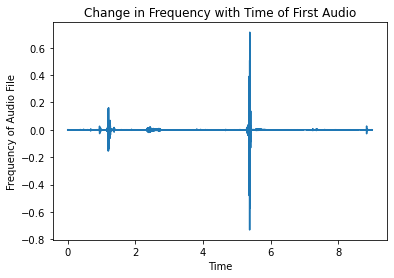

In [13]:
# Create the time range for plotting the frequency
time=np.arange(0,len(audio))/sfreq
# plot the frequency
plt.plot(time, audio)
plt.xlabel("Time")
plt.ylabel("Frequency of Audio File")
plt.title("Change in Frequency with Time of First Audio")
plt.savefig("first.png", dpi=300)
plt.show()

In [16]:
print(audio.min())

-0.73076606


In [15]:
data_df[['sfreq','min','mean','max']]=""

In [17]:
for i in range(len(audio_files)):
    audio, sfreq =lr.load(audio_files[i])
    data_df.loc[data_df['fname']==audio_files[i].replace('\\','/'), 'sfreq']=sfreq
    data_df.loc[data_df['fname']==audio_files[i].replace('\\','/'), 'min']=audio.min()
    data_df.loc[data_df['fname']==audio_files[i].replace('\\','/'), 'mean']=audio.mean()
    data_df.loc[data_df['fname']==audio_files[i].replace('\\','/'), 'max']=audio.max()

In [18]:
data_df.head()

,dataset,fname,label,sfreq,min,mean,max
0,a,set_a/artifact__201012172012.wav,artifact,22050,-0.730766,-1.04662e-05,0.712701
1,a,set_a/artifact__201105040918.wav,artifact,22050,-0.0173211,-1.10528e-06,0.0158929
2,a,set_a/artifact__201105041959.wav,artifact,22050,-0.0204537,4.74498e-07,0.0195355
3,a,set_a/artifact__201105051017.wav,artifact,22050,-0.920064,-1.36942e-05,0.762148
4,a,set_a/artifact__201105060108.wav,artifact,22050,-0.905326,-2.86369e-05,0.924389


## Need to change the label to numeric value so that classification can be done

In [19]:
data_df['class']=""
data_df.loc[data_df.label=='normal', 'class']=0
data_df.loc[data_df.label!='normal','class']=1

In [20]:
data_df.head()

,dataset,fname,label,sfreq,min,mean,max,class
0,a,set_a/artifact__201012172012.wav,artifact,22050,-0.730766,-1.04662e-05,0.712701,1
1,a,set_a/artifact__201105040918.wav,artifact,22050,-0.0173211,-1.10528e-06,0.0158929,1
2,a,set_a/artifact__201105041959.wav,artifact,22050,-0.0204537,4.74498e-07,0.0195355,1
3,a,set_a/artifact__201105051017.wav,artifact,22050,-0.920064,-1.36942e-05,0.762148,1
4,a,set_a/artifact__201105060108.wav,artifact,22050,-0.905326,-2.86369e-05,0.924389,1


## Let's see how a simple machine learning algorithm works on this dataset

In [60]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model=LinearSVC()
#extract the features and label in seperate sheet
X=data_df[['min','mean','max']].values
y=data_df['class'].values.astype(int)
#Split the dataset
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, stratify=y, random_state=111)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
display('The testing accuracy is {}'.format(accuracy_score(y_test, predictions)))
predictions=model.predict(X_train)
display('The training accuracy is {}'.format(accuracy_score(y_train, predictions)))


'The testing accuracy is 0.7368421052631579'

'The training accuracy is 0.7558139534883721'

## This is simple feature engineering for sound waveform. Now lets create an envolpe for the waveform

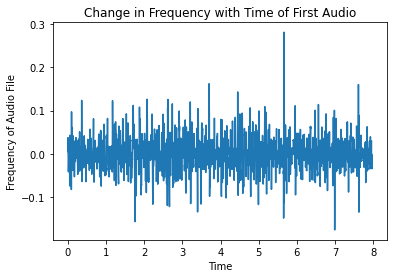

In [69]:
audio, sfreq=lr.load(audio_files[50])
time=np.arange(0,len(audio))/sfreq
plt.plot(time, audio)
plt.xlabel("Time")
plt.ylabel("Frequency of Audio File")
plt.title("Change in Frequency with Time of First Audio")
plt.savefig("2.png", dpi=300)
plt.show()

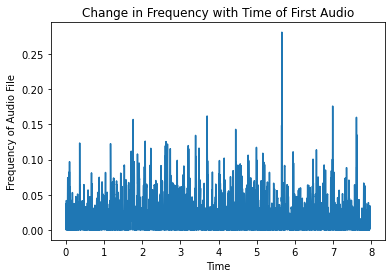

In [70]:
#recitified the -ve values in audio
audio_rect=np.abs(audio)
#plot the graph for rectified
plt.plot(time, audio_rect)
plt.xlabel("Time")
plt.ylabel("Frequency of Audio File")
plt.title("Change in Frequency with Time of First Audio")
plt.savefig("3.png", dpi=300)
plt.show()

In [88]:
print(type(audio))

<class 'numpy.ndarray'>


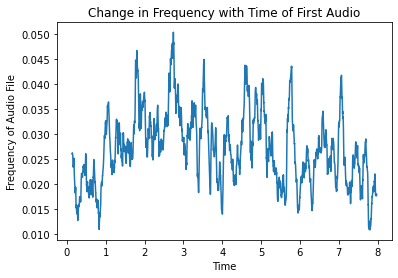

In [87]:
#Now create envolpe using rolling window
audio_env=pd.DataFrame(audio_rect)
audio_env=audio_env.rolling(3000).mean()
audio_env=audio_env.to_numpy()
#plot the graph for smooth audio
plt.plot(time, audio_env)
plt.xlabel("Time")
plt.ylabel("Frequency of Audio File")
plt.title("Change in Frequency with Time of First Audio")
plt.savefig("4.png", dpi=300)
plt.show()

In [111]:
files=[]
for i in range(5):
    audio, sfreq=lr.load(audio_files[i])
    files.append([audio_files[i],audio])
audio_all=pd.DataFrame(files)
audio_all.head()

,0,1
0,set_a\artifact__201012172012.wav,"[2.2960085e-05, -0.00012982322, -0.00018070513..."
1,set_a\artifact__201105040918.wav,"[-1.0927635e-05, 1.0574424e-06, 2.108567e-06, ..."
2,set_a\artifact__201105041959.wav,"[3.728857e-05, -0.0001664555, -7.4023155e-05, ..."
3,set_a\artifact__201105051017.wav,"[-0.0027429417, -0.0066496185, -0.0049779303, ..."
4,set_a\artifact__201105060108.wav,"[0.000106223946, 0.0015002153, 0.0097254915, 0..."


(176, 198450)

In [106]:
a=[1,2,3,4]
b="sandhu"
x=[]

In [107]:
x.append((a,b))

In [108]:
print(x)

[([1, 2, 3, 4], 'sandhu')]
